![kaggle bike sharing demand logo](./images/bike.png)

<center> 
### Bike Sharing Demand

### Data Fields

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

### Decision Tree Regressor - Use [scikit](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

### Cross Validation - Avoiding [Overfitting](http://scikit-learn.org/stable/modules/cross_validation.html).

### Ensemble Learning - Random forest
- [link](https://docs.google.com/viewerng/viewer?url=http://www.cmlab.csie.ntu.edu.tw/~cyy/learning/tutorials/EnsembleLearning.pdf)
- [wiki](https://en.wikipedia.org/wiki/Random_forest)
- [scikit](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
- [more doc](http://hhtucode.blogspot.tw/2013/06/ml-random-forest.html)

### The Criteria - Root Mean Squared Logarithmic Error - - [kaggle forum](https://www.kaggle.com/wiki/RootMeanSquaredLogarithmicError)

### Pearson correlation
 - Example : [link](http://stackoverflow.com/questions/3949226/calculating-pearson-correlation-and-significance-in-python)
 - scipy lib : [link](http://docs.scipy.org/doc/scipy/reference/stats.html)

In [1]:
# pandas api : http://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
import matplotlib.pyplot as plt
# seaborn tutorial : https://stanford.edu/~mwaskom/software/seaborn/tutorial.html
import seaborn as sns
from pydoc import help
import scipy
import numpy as np

# help(scipy.stats.stats.pearsonr)
# pearsonr example
# scipy.stats.stats.pearsonr(d[['windspeed']], d[['count']])

In [2]:
def draw_corr_heatmap(raw_dataframe):
  # dataframe support method
  corr = raw_dataframe.corr()

  # Generate a mask for the upper triangle
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(11, 9))

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, mask=mask, cmap=cmap, square=True, )

### Break Datetime into Date and Time Columns

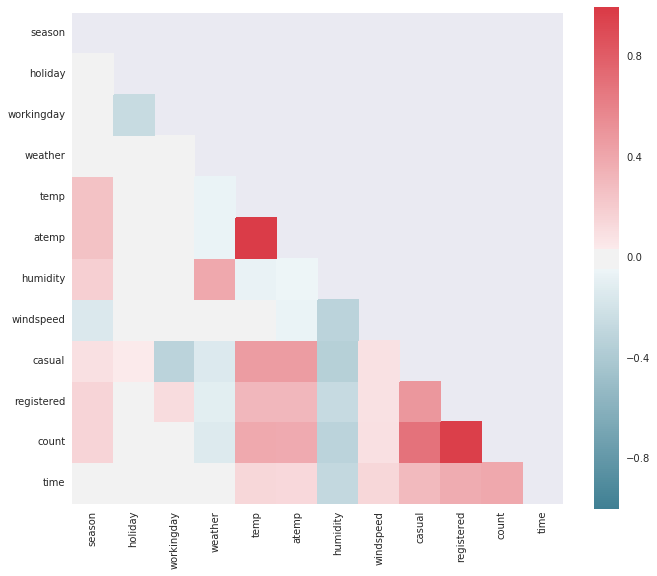

In [3]:
with open('set/bsd/train.csv') as f:
  X = pd.read_csv(f)
X['date'] = X['datetime'].str.extract('(....-..-..)', expand= False)
X['date'] = X['date'].str.replace(pat= '....-..', repl= '')
X['time'] = X['datetime'].str.extract('(..:..:..)', expand= False)
X['time'] = X['time'].str.replace(pat= ':..:..', repl = '')
X['time'] = X['time'].apply(lambda x: int(x))

draw_corr_heatmap(X)

In [4]:
with open(''set/bsd/test.csv') as f:
  T = pd.read_csv(f)
  
T['date'] = T['datetime'].str.extract('(....-..-..)', expand= False)
T['date'] = T['date'].str.replace(pat= '....-..', repl= '')
T['time'] = T['datetime'].str.extract('(..:..:..)', expand= False)
T['time'] = T['time'].str.replace(pat= ':..:..', repl= '')

In [5]:
import sklearn.tree
xcolumns = [u'season', u'holiday', u'workingday', u'weather', u'temp', 
           u'atemp', u'humidity', u'windspeed',  u'date', u'time']
map(lambda c: X[c].apply(lambda x: float(x)), xcolumns + ['count'])
regressor = sklearn.tree.DecisionTreeRegressor(random_state = 0)
regressor.fit(X[xcolumns], X[['count']])
result = regressor.predict(T[xcolumns])
result

array([  11.,    5.,    8., ...,   66.,  102.,   28.])

In [6]:
def Parallel( ncpu, func, subfuncs, packages, inputs):
    import pp
    import time
    ppservers = ()
    ncpus = ncpu
    job_server = pp.Server(ncpus = ncpus, ppservers = ppservers)
    print str.format('Start pp with {} works.', job_server.get_ncpus())

    start_time = time.time()

    jobs = [(input, job_server.submit(func, (input,), subfuncs, packages)) for input in inputs]

    for input, job in jobs:
      print str.format('func({}) is {}', input, job())
      print str.format('Time eclapsed is {} s', time.time() - start_time)

### Some Issues

- Predict casual and registered separately.
- Limit the depth of regression tree.

### Reference

- Kaggle Link [link](https://www.kaggle.com/c/bike-sharing-demand)
- ctree: Conditional Inference Trees [link](https://docs.google.com/viewerng/viewer?url=http://cran.r-project.org/web/packages/partykit/vignettes/ctree.pdf)
- Unbiased Recursive Partitioning: A Conditional Inference Framework [link](https://drive.google.com/viewerng/viewer?url=http://statmath.wu-wien.ac.at/~zeileis/papers/Hothorn%2BHornik%2BZeileis-2006.pdf)